<a href="https://colab.research.google.com/github/clferreira1985/Projetos_Python/blob/main/Meriskill%20Internship/Project2-Diabetes_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes



## 1. Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE



## 2. Access and Data Processing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Lets create a function to check the health of the data
def about_dataset(df):
    print('*********************')
    print()
    print('*******SHAPE*********')
    print('Shape of the dataset is : ',df.shape)
    print()
    print('*******Is Null*********')
    print(df.isna().sum())
    print()
    print('*******Tail*********')
    print(df.tail())
    print()
    print('*******columns in the dataframe*********')
    print()
    print(df.columns)
    print()
    print('*******About the dataset*********')
    df.info()
    print()
    print('*******Stats on the columns of the dataframe*********')
    print()
    print(df.describe())

In [4]:
about_dataset(df)

*********************

*******SHAPE*********
Shape of the dataset is :  (768, 9)

*******Is Null*********
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*******Tail*********
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765   

The dataset has no missing data, and I didn't see the need to manipulate the data.

## 3. Visual representation of the data

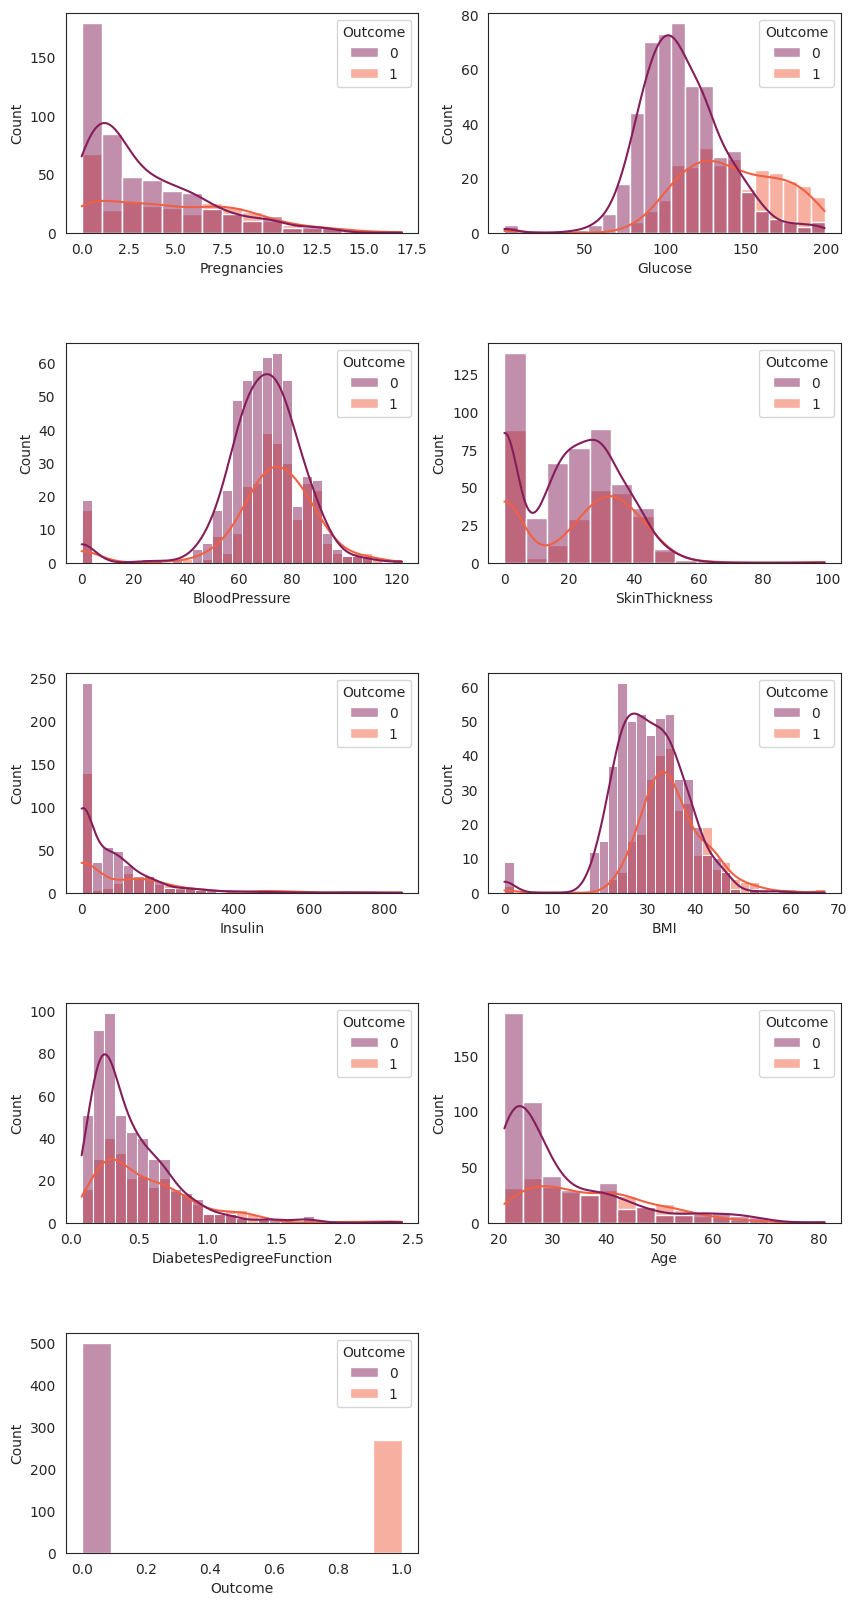

In [5]:
plt.figure(figsize = (10,20))
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in df:
    plt.subplot(5,2,i)
    sns.histplot( data=df, x=name, hue="Outcome",kde=True,palette="rocket" )
    i = i + 1

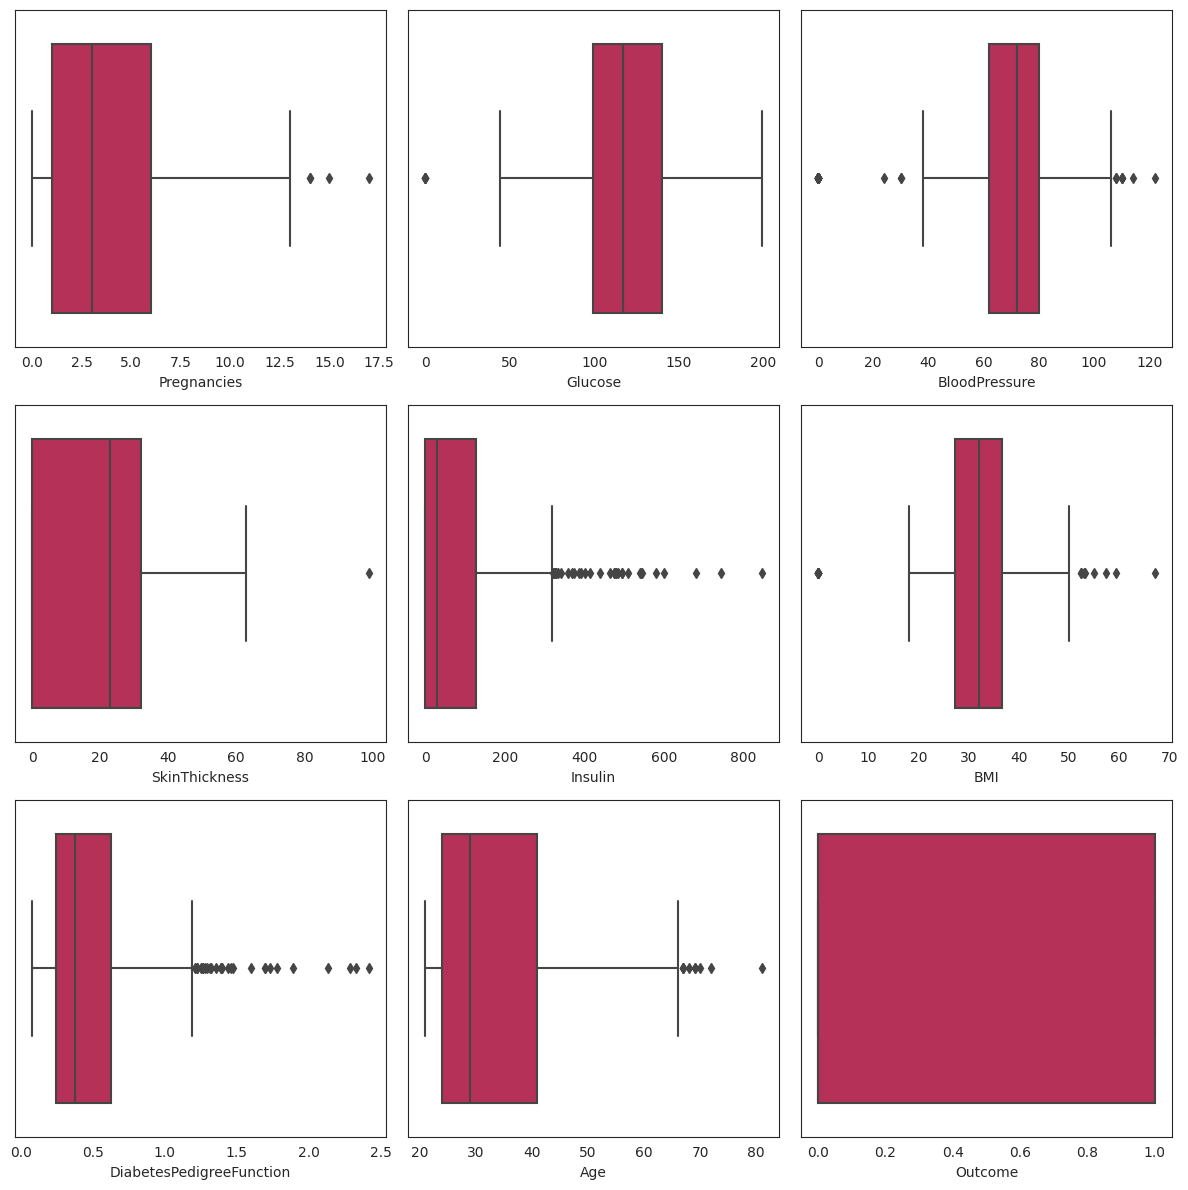

In [6]:
plt.figure(figsize=(12, 12))
i = 1
for col in df.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, palette="rocket")
    i += 1

plt.tight_layout()
plt.show()

Based on the charts, I was able to observe that the columns exhibit two types of situations:


1.   Normal distributions are present in the BMI, Glucose, Blood Pressure, and Skin Thickness charts.

2.   Right-skewed distributions are observed in the Pregnancies, Insulin, Diabetes Pedigree Function, and Age charts.

I will continue the analysis without performing any treatment.

## 4. Dividing the dataset into train_test


In [7]:
# Data preparation for modeling

X  = df.drop('Outcome',axis = 1).values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

# Create fold to perform validation

partitions = 7
scoring="accuracy"
kfold = KFold(n_splits = partitions, shuffle = True, random_state = 7 )

## 5. Creating a Pipeline


In [8]:
# definindo uma semente global
np.random.seed(9)

#Lista que armazenará os modelos
models = []

#Criando os modelos e adicionando-os na lista de modelos

models.append(('LR', LogisticRegression(max_iter=1000, verbose=0)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Definindo os parâmetros do classificador base para o bagginclassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=1000, verbose=0)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(("cart", model2))
model3 = SVC()
bases.append(('SVM',model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

In [9]:
# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

    # Calcula a média e o desvio padrão dos resultados
    mean_score = np.mean(cv_results)
    std_score = np.std(cv_results)

    msg = "%s: %f (%f)" % (name, mean_score, std_score)
    print(msg)

LR: 0.765581 (0.044512)
KNN: 0.719809 (0.038885)
CART: 0.677638 (0.055970)
NB: 0.754198 (0.028769)
SVM: 0.750896 (0.035135)
Bagging: 0.736155 (0.037653)
RF: 0.744290 (0.040723)
ET: 0.745951 (0.039540)
Ada: 0.718298 (0.032682)
GB: 0.726470 (0.050037)
Voting: 0.760729 (0.039113)


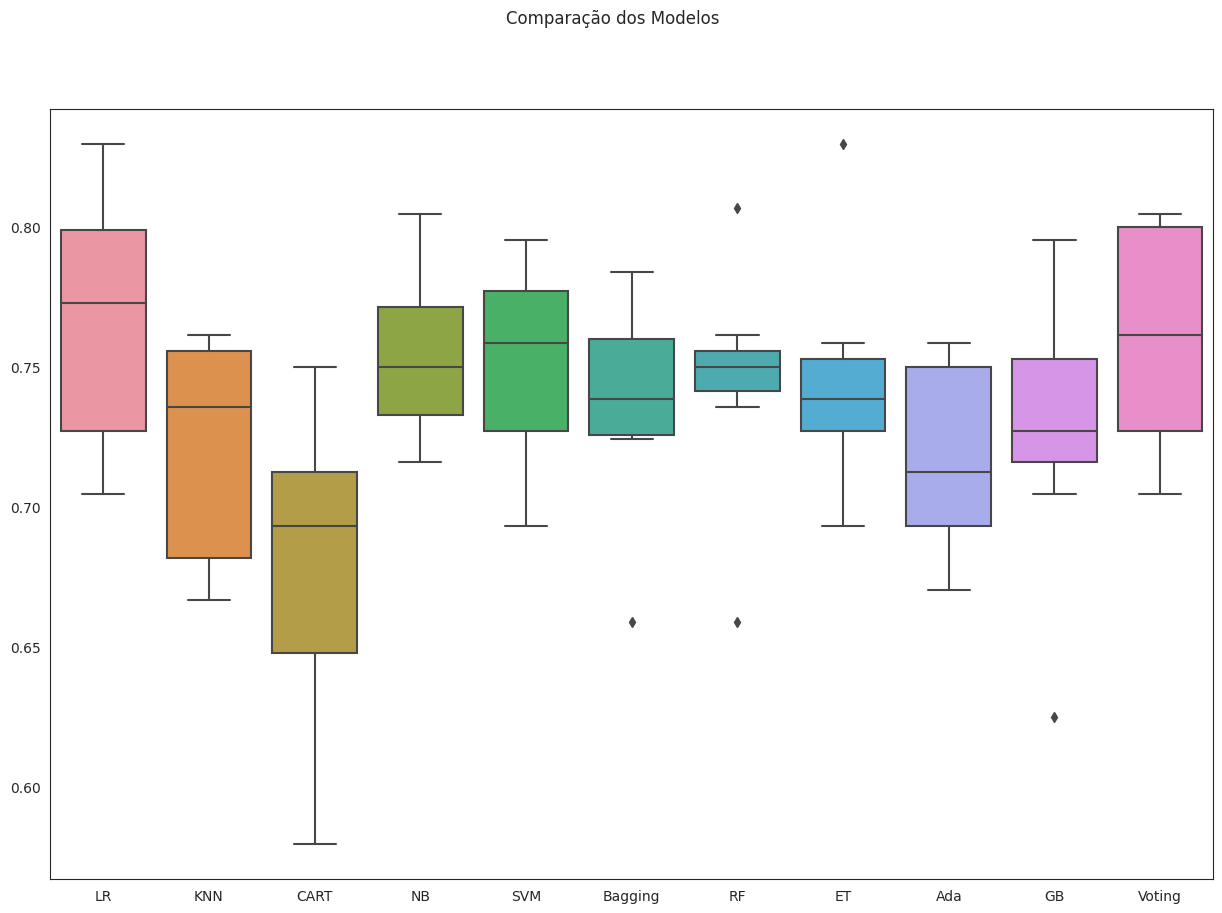

In [10]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

Based on the presented results, the model that achieved the best average performance was Voting, with an average score of 0.760729. The LR (Logistic Regression) model also performed well, with an average score of 0.765581.

It's important to note that the choice of the best model also depends on the specific task and the evaluation metrics relevant to the problem at hand. Additionally, the standard deviations (indicated in parentheses) provide a measure of variability in the results across cross-validation folds. A lower standard deviation may indicate greater consistency and reliability in performance estimates.

#### **Creation and Evaluation of Models: Standardized and Normalized Data**
I will create an algorithm that will compare the performance of various classification models on different data views. It will create pipelines that combine classification algorithms with different data transformations, run the pipelines using cross-validation, and display a boxplot to compare the results.

In [11]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results=[]
names=[]

#Criando os elementos do pipeline

#Algoritimo que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=1000, verbose=0))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

#Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

#Montando os pipelines

pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

In [12]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

LR-orig: 0.766 (0.045)
KNN-orig: 0.720 (0.039)
CART-orig: 0.678 (0.056)
NB-orig: 0.754 (0.029)
SVM-orig: 0.751 (0.035)
Bag-orig: 0.736 (0.038)
RF-orig: 0.744 (0.041)
ET-orig: 0.746 (0.040)
Ada-orig: 0.718 (0.033)
GB-orig: 0.726 (0.050)
Vot-orig: 0.761 (0.039)
LR-padr: 0.764 (0.042)
KNN-padr: 0.725 (0.040)
CART-padr: 0.691 (0.055)
NB-padr: 0.754 (0.029)
SVM-padr: 0.730 (0.058)
Bag-padr: 0.731 (0.045)
RF-padr: 0.748 (0.047)
ET-padr: 0.752 (0.043)
Ada-padr: 0.720 (0.033)
GB-padr: 0.723 (0.051)
Vot-padr: 0.749 (0.054)
LR-norm: 0.761 (0.038)
KNN-norm: 0.718 (0.033)
CART-norm: 0.681 (0.049)
NB-norm: 0.754 (0.029)
SVM-norm: 0.739 (0.051)
Bag-norm: 0.739 (0.043)
RF-norm: 0.741 (0.029)
ET-norm: 0.735 (0.037)
Ada-norm: 0.718 (0.033)
GB-norm: 0.730 (0.044)
Vot-norm: 0.746 (0.051)


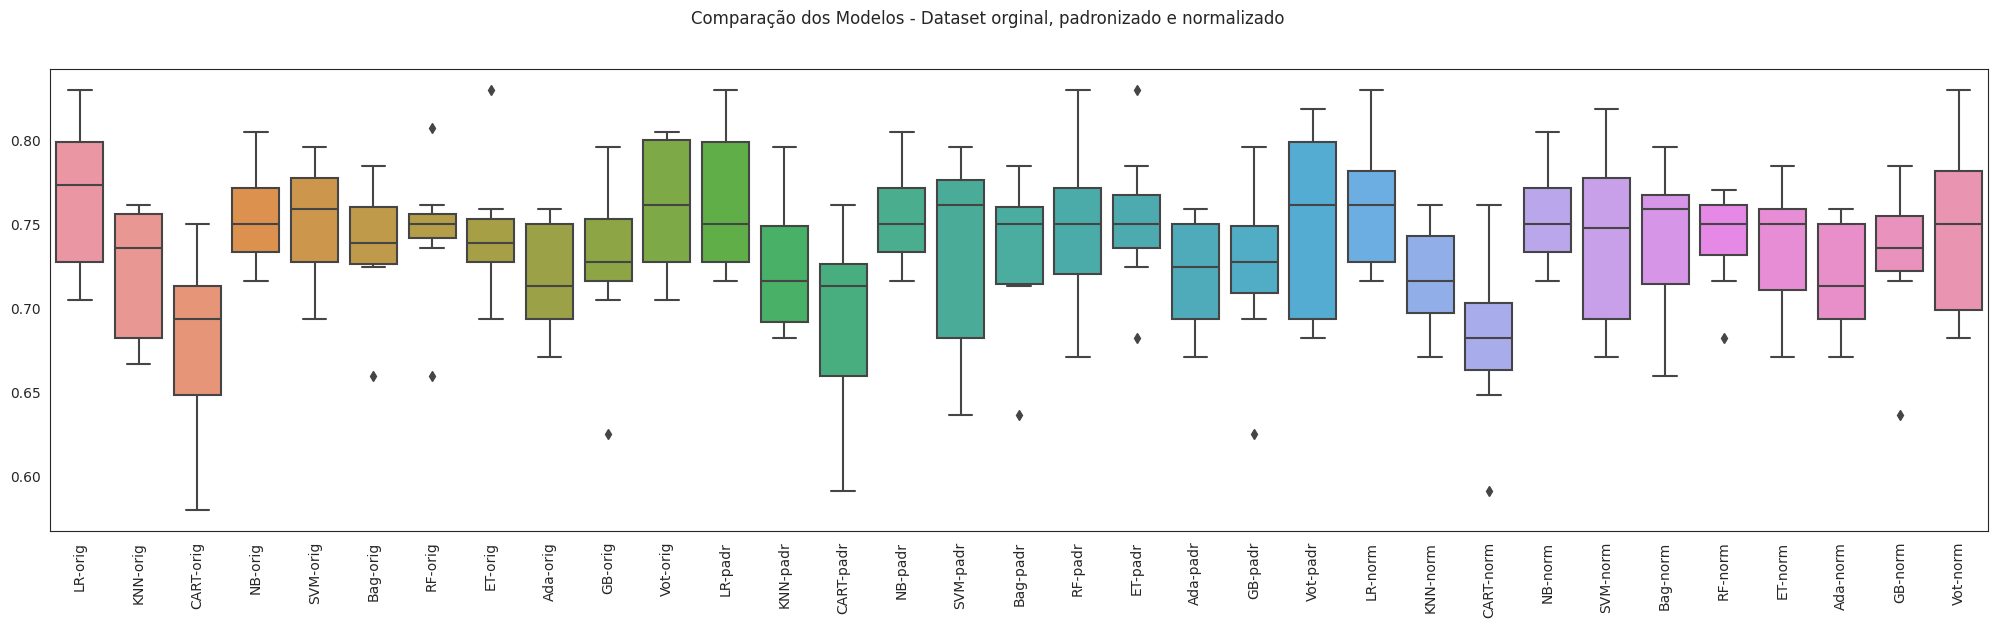

In [13]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names, rotation=90)
plt.show()

The best result among the provided scores is:

For Original Data:

Model Vot-orig: 0.761 (0.039)
For Standardized Data:

Model LR-padr: 0.764 (0.042)
For Normalized Data:

Model LR-norm: 0.761 (0.038)
The model "Vot-orig" achieved the highest average performance score for the original data, while the model "LR-padr" and "LR-norm" achieved the highest average performance scores for the standardized and normalized data, respectively.



## 6. Hyperparameter Optimization

In [36]:
rfc = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100)
model2 = DecisionTreeClassifier()
model3 = SVC()

voting_classifier = VotingClassifier(estimators=[
    ('rfc', rfc),
    ('cart', model2),
    ('SVM', model3)
], voting='hard')

voting_classifier.fit(X_train, y_train)

predictions = voting_classifier.predict(X_test)



In [37]:
confusion = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86        97
           1       0.81      0.61      0.70        57

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



              precision    recall  f1-score   support

           0       0.80      0.92      0.86        97
           1       0.81      0.61      0.70        57

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



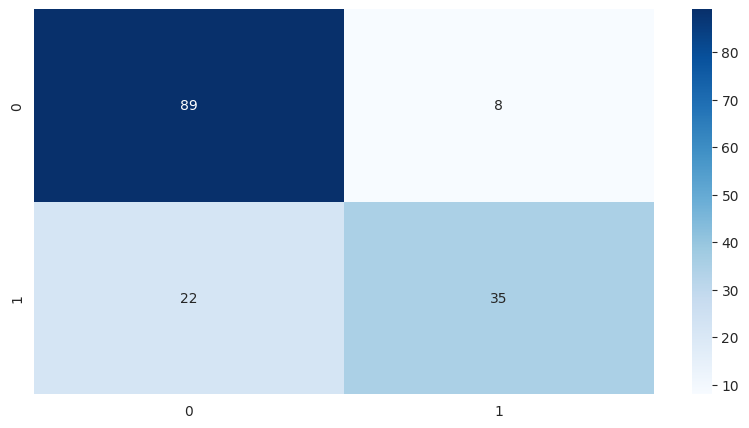

In [38]:
confusion_mat = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

plt.figure(figsize=(10, 5))
sns.heatmap(confusion_mat, annot=True, fmt='.0f', cmap='Blues')
plt.show()


I noticed that the model has a higher accuracy for people without diabetes, while for those with diabetes, the accuracy decreases significantly.